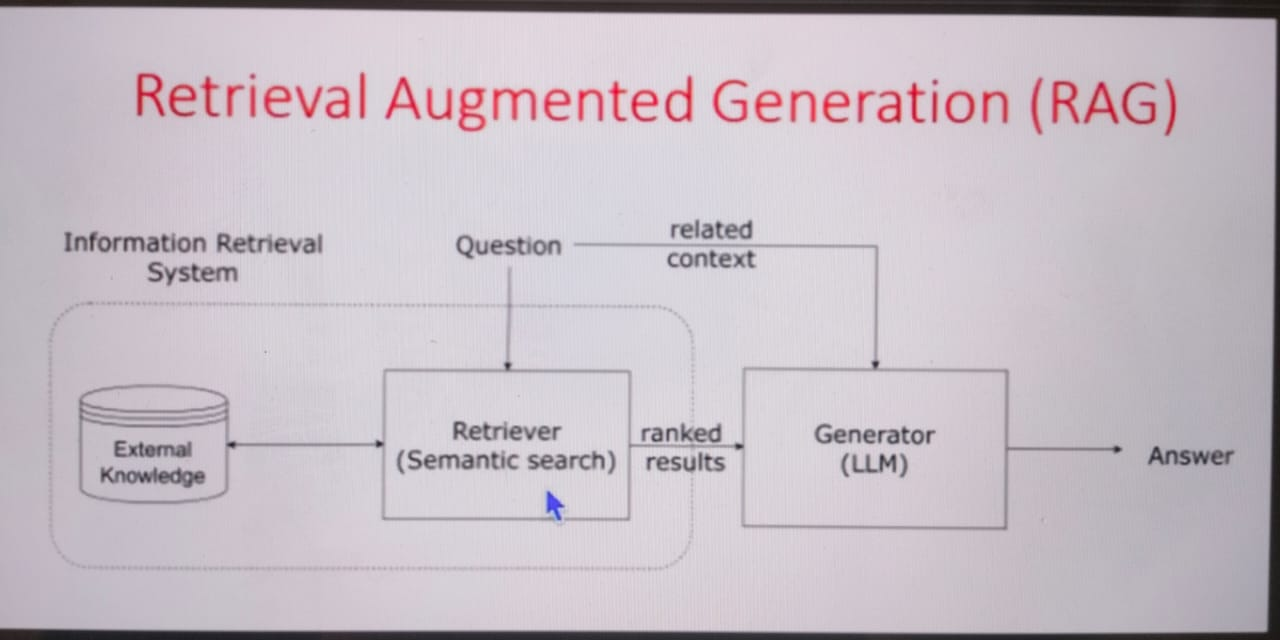

Part 1: Overall Product Specification

Problem Statement: We are given set of life insurance documents. Our purpose is to build a RAG application for efficient searching in the documents.

In [ ]:
# Importing necessary libraries
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Document loaders for SimpleDirectoryReader
!pip install docx2txt
!pip install pypdf

# Install OpenAI
!pip install openai


  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=d946c2c983969984f77ed9419f9dae0c7727248c5ce25fa7871ad8206760fefd
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [ ]:
#import openAI
from llama_index.llms.openai import OpenAI
#import ChatMessage
from llama_index.core.llms import ChatMessage
#import os
import os
import openai

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Set API key
filepath="/content/drive/MyDrive/GenAI/RAG-project/"
with open(filepath + "openai_api_key.txt","r") as f:
  openai.api_key=''.join(f.readlines())

In [ ]:
#import SimpleDirectoryReader
from llama_index.core import SimpleDirectoryReader

# Create object of SimpleDirectoryReader
reader=SimpleDirectoryReader(input_dir="/content/drive/MyDrive/GenAI/RAG-DEMO/Policy-Documents/")

In [ ]:
documents=reader.load_data()
#lenth of documents
print(f"Loaded {len(documents)} documents/pages successfully.")

Loaded 217 documents/pages successfully.


In [ ]:
documents[0]

Document(id_='5787c354-ec24-42f3-9e61-e6190b49af1d', embedding=None, metadata={'page_label': '1', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/MyDrive/GenAI/RAG-DEMO/Policy-Documents/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2024-03-31', 'last_modified_date': '2024-03-31'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n             Part A \n<<Date>> \n<<Policyholder’s Name>>  \n<<Policyholder’s Address>> \n<<Policyholder’s Contact Number>>  \n \nDear <<Policyholder’s Name>>,  \n \nSub: Your Policy no. <<  >> \nWe are glad to inform you that your proposal has been accepted and the HDFC Life Easy Healt

Step 4: Building the query engine

In [ ]:
# import SimpleNodeParser
from llama_index.core.node_parser import SimpleNodeParser
# import VectorStoreIndex
from llama_index.core import VectorStoreIndex
# import display, HTML
from IPython.display import display, HTML


# Create parser and parse docuemnts into nodes
parser=SimpleNodeParser.from_defaults()
nodes=parser.get_nodes_from_documents(documents)

# build index
index=VectorStoreIndex(nodes)

#construct query engine
query_engine=index.as_query_engine()


In [ ]:
#query
response=query_engine.query("What provisions may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)?")

In [ ]:
response.response

'The provisions that may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA) could include specific clauses in the policy document that outline extended reinstatement timelines or special considerations for individuals returning from military service.'

In [ ]:
dir(response)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__pydantic_initialised__',
 '__pydantic_model__',
 '__pydantic_run_validation__',
 '__pydantic_validate_values__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__validate__',
 '__weakref__',
 'get_formatted_sources',
 'metadata',
 'response',
 'source_nodes']

In [ ]:
response.metadata

{'0ceded9c-504d-4879-bc59-d0eb06b6f0d2': {'page_label': '11',
  'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf',
  'file_path': '/content/drive/MyDrive/GenAI/RAG-DEMO/Policy-Documents/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf',
  'file_type': 'application/pdf',
  'file_size': 1990500,
  'creation_date': '2024-03-31',
  'last_modified_date': '2024-03-31'},
 '0685a662-ec44-4210-ba8e-5269dfe87c04': {'page_label': '9',
  'file_name': 'HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf',
  'file_path': '/content/drive/MyDrive/GenAI/RAG-DEMO/Policy-Documents/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf',
  'file_type': 'application/pdf',
  'file_size': 1371541,
  'creation_date': '2024-03-31',
  'last_modified_date': '2024-03-31'}}

In [ ]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='0ceded9c-504d-4879-bc59-d0eb06b6f0d2', embedding=None, metadata={'page_label': '11', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/MyDrive/GenAI/RAG-DEMO/Policy-Documents/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_type': 'application/pdf', 'file_size': 1990500, 'creation_date': '2024-03-31', 'last_modified_date': '2024-03-31'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='c58796a5-51a4-4640-a415-c87538acb693', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '11', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/My

In [ ]:
len(response.source_nodes)

2

In [ ]:
print(response.source_nodes[0].node.metadata['file_name'])
print(response.source_nodes[0].node.metadata['page_label'])

HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf
11


In [ ]:
print(response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label'])

HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf Page No 11


In [ ]:
# Extract the score
print(response.source_nodes[0].score)

0.7711361909629276


In [ ]:
# Response Node Text
response.source_nodes[0].node.text

'D.2.2.  Notwithstanding anything to the contrary contained elsewhere in this Policy, the Company reserves the right to revive  \nthe lapsed Policy either on its original terms and conditions or on such other or modified terms and conditions as the \nCompany may specify or to reject the Revival . If needed the Company may refer it to its medical examiner in decid ing \non Revival  of lapse d Policy. Subject to the provisions of Clauses D.2.1 above, the Revival  shall come into effect on the \ndate when the Company specifically communicates it in writing to the Policyholder.  \n \nD.2.3  If the Policy is not revived for full Benefits before the Policy  Maturity Date but within five years from the due date for \npayment of the first unpaid Premium and if the Policy has not acquired Guaranteed Surrender Value, then the Policy \nwill terminate.  \n \nD.3.  Non-Forfeiture options : PART D  \nPolicy Servicing Related Aspects'

Step 6: Creating response pipeline

In [ ]:
# Query response function
def query_response(user_input):
  response=query_engine.query(user_input)
  file_name=response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label']
  final_response=response.response + "\nCheck further at " + file_name
  return final_response

In [ ]:
def initialize_conv():
  print("Feel free to ask questions related to insurance policies. Enter exit once you are done!")
  while True:
    user_input=input()
    if user_input.lower() == "exit":
      print("Exiting the program. Bye!!!")
      break
    else:
      response=query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))


In [ ]:
initialize_conv()

Feel free to ask questions related to insurance policies. Enter exit once you are done!
What provisions may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)?


exit
Exiting the program. Bye!!!


Step 7: Building a test pipeline

In [ ]:
questions=["What provisions may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)?",
           "How is the peroid of time during which a reinstated Member's insurance was not in force treated for the purpose of determining the length of continuous coverage under the Group Policy?",
           "What are the requirements for placing in force any Scheduled benefit that would have been subject to Proof of Good Health has the member remained continuously insured?"]

In [ ]:
import pandas as pd

def testing_pipeline(questions):
  test_feedback=[]
  for i in questions:
    print(i)
    print(query_response(i))
    print("\nPlease provide your feedback on the response provided by bot")
    user_input=input()
    page=query_response(i).split()[-1]
    test_feedback.append((i,query_response(i),page,user_input))

  feedback_df=pd.DataFrame(test_feedback,columns=["Question","Response","Page","Good/Bad"])
  return feedback_df

In [ ]:
testing_pipeline(questions)

What provisions may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)?
Provisions related to the revival of a lapsed policy may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA).
Check further at HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf Page No 11

Please provide your feedback on the response provided by bot
Yes
How is the peroid of time during which a reinstated Member's insurance was not in force treated for the purpose of determining the length of continuous coverage under the Group Policy?
The period of time during which a reinstated Member's insurance was not in force is typically not considered when determining the length of continuous coverage under the Group Policy.
Check further at HDFC-Life-Group-Term-Life

,Question,Response,Page,Good/Bad
0,What provisions may allow for a longer reinsta...,The provisions that may allow for a longer rei...,11,Yes
1,How is the peroid of time during which a reins...,The period of time during which a reinstated M...,15,Good
2,What are the requirements for placing in force...,The requirements for placing in force any Sche...,15,Bad


Part 3: Next steps

3.1 Building a custom promt template

In [ ]:
response=query_engine.query("What provisions may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)?")

In [ ]:
response.response

"The provisions that may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA) could include clauses that specify the Company's right to revive a lapsed Policy on modified terms and conditions, subject to certain conditions being met."

In [ ]:
# response source nodes

response.source_nodes

[NodeWithScore(node=TextNode(id_='0ceded9c-504d-4879-bc59-d0eb06b6f0d2', embedding=None, metadata={'page_label': '11', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/MyDrive/GenAI/RAG-DEMO/Policy-Documents/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_type': 'application/pdf', 'file_size': 1990500, 'creation_date': '2024-03-31', 'last_modified_date': '2024-03-31'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='c58796a5-51a4-4640-a415-c87538acb693', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '11', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/My

In [ ]:
response.source_nodes[0]

NodeWithScore(node=TextNode(id_='0ceded9c-504d-4879-bc59-d0eb06b6f0d2', embedding=None, metadata={'page_label': '11', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/MyDrive/GenAI/RAG-DEMO/Policy-Documents/HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_type': 'application/pdf', 'file_size': 1990500, 'creation_date': '2024-03-31', 'last_modified_date': '2024-03-31'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='c58796a5-51a4-4640-a415-c87538acb693', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '11', 'file_name': 'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf', 'file_path': '/content/drive/MyD

In [ ]:
response.source_nodes[1].node.text

'Page 9 of 31 \n In case if the Scheme Member surrenders the Certificate of Insurance anytime during the Coverage Term, \nsurrender value will be calculated as given below: \n \n \nWhere, \nTerm Definition \nM Elapsed months since coverage inception, any part of month shall be counted as full. \nN Number of months for which premiums are payable \nP Policy Term in months \nT Number of months for which premiums are paid \nTotal Premiums Paid  Total premiums paid means total of all premiums received, excluding any extra premium, \nany rider premium and taxes. \nOriginal Sum \nAssured The Sum Assured specified for the Member at inception. \nCurrent Sum \nAssured The Sum Assured applicable in the policy month of surrender as per the repayment schedule \nset at inception. This will be equal to the Original Sum Assured for level term assurance \ncoverage. \nUpon payment of surrender benefit the cover for that Scheme Member (Single Life or Joint Life) terminates \nand no further benefits are p

In [49]:
reference_0 = " Check further at " + response.source_nodes[0].node.metadata['file_name'] + " Page No " + response.source_nodes[0].node.metadata['page_label']
reference_1 = " Check further at " + response.source_nodes[1].node.metadata['file_name'] + " Page No " + response.source_nodes[1].node.metadata['page_label']
retrieved = response.source_nodes[0].node.text + reference_0 + response.source_nodes[1].node.text + reference_1
retrieved

'D.2.2.  Notwithstanding anything to the contrary contained elsewhere in this Policy, the Company reserves the right to revive  \nthe lapsed Policy either on its original terms and conditions or on such other or modified terms and conditions as the \nCompany may specify or to reject the Revival . If needed the Company may refer it to its medical examiner in decid ing \non Revival  of lapse d Policy. Subject to the provisions of Clauses D.2.1 above, the Revival  shall come into effect on the \ndate when the Company specifically communicates it in writing to the Policyholder.  \n \nD.2.3  If the Policy is not revived for full Benefits before the Policy  Maturity Date but within five years from the due date for \npayment of the first unpaid Premium and if the Policy has not acquired Guaranteed Surrender Value, then the Policy \nwill terminate.  \n \nD.3.  Non-Forfeiture options : PART D  \nPolicy Servicing Related Aspects Check further at HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Docum

In [50]:
messages=[
          {
              "role":"system",
              "content":"You are AI assistent to user."
          },
          {
              "role":"user",
              "content": f"""What provisions may allow for a longer reinstatement period for an approved leave of absence taken
              in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)? Check in '{retrieved}'
              """
          }
        ]
messages

[{'role': 'system', 'content': 'You are AI assistent to user.'},
 {'role': 'user',
  'content': "What provisions may allow for a longer reinstatement period for an approved leave of absence taken\n              in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)? Check in 'D.2.2.  Notwithstanding anything to the contrary contained elsewhere in this Policy, the Company reserves the right to revive  \nthe lapsed Policy either on its original terms and conditions or on such other or modified terms and conditions as the \nCompany may specify or to reject the Revival . If needed the Company may refer it to its medical examiner in decid ing \non Revival  of lapse d Policy. Subject to the provisions of Clauses D.2.1 above, the Revival  shall come into effect on the \ndate when the Company specifically communicates it in writing to the Policyholder.  \n \nD.2.3  If the Policy is not revived for full Benefits before the Policy  Maturity Date but wit

In [51]:
response2=openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=messages
)
response2.choices[0].message.content

'The provisions that may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA) include the following:\n\n- The policy may be revived for full benefits within five years from the due date for payment of the first unpaid premium, subject to approval from the company and meeting certain criteria.\n- A written application for revival must be received from the policyholder, along with evidence of insurability and health of the life assured to the satisfaction of the company.\n- All amounts necessary to revive the policy, including all arrears premiums with interest/revival charge, must be paid as per the stipulated formula.\n- The revival of the policy may be on its original terms and conditions or on modified terms as specified by the company.\n- The company reserves the right to reject the revival of a lapsed policy and may refer it to a medical examiner for a decisio

3.2 Recommendations on How to improve further



*   Based on testing pipeline's feedback, develop a strategy how to improve it further


*   This can be done thorough building a better/cleaner dataset or utilizing better data pre-processing techniques
   



Suggestion 1: Using customized nodes and LLMs

This can be used if responses are not accurate or is not being summarized very well

In [ ]:
#import OpenAIEmbedding
from llama_index.embeddings.openai import OpenAIEmbedding
#import SentenceSplitter
from llama_index.core.node_parser import SentenceSplitter
#import OpenAI
from llama_index.llms.openai import OpenAI
#import Settings
from llama_index.core import Settings

#Initialize the openAI model
Settings.lm=OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=256)

#Initialize the embedding model
Settings.embed_model=OpenAIEmbedding()

#Initialize the node_parser with custom node settings
Settings.node_parser=SentenceSplitter(chunk_size=512, chunk_overlap=20)

# Initialize the num_output and context window
Settings.num_output=512
Settings.context_window=3900

#Create a VectorStoreIndex from a list of documents using the service context
index=VectorStoreIndex.from_documents(documents)

# Initialize a query engine for the index with a specified similiarity with top-k values
query_engine=index.as_query_engine(similarity_top_k=3)


In [ ]:
#Query the engine with specific question

response=query_engine.query("""What provisions may allow for a longer reinstatement period for an approved leave of absence taken
              in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA)?""")

In [ ]:
response.response

'The provisions that may allow for a longer reinstatement period for an approved leave of absence taken in accordance with the Uniformed Services Employment and Reemployment Rights Act of 1994 (USERRA) are typically subject to the Board Approved Underwriting Policy of the insurer. These provisions may include considering requests from the policyholder to revive lapsed or paid-up policies within a specified timeframe, usually within five years from the date of lapse or becoming paid-up, and payment of any unpaid premiums with applicable interest as determined by the insurer.'